
#  Carlos Álvarez

### **Git-hub: https://github.com/Alvarez527**
### **Linkedin: www.linkedin.com/in/cralvarez-ai**

## Advanced Machine Learning Methods


#### Professor: Pepe Cantoral Ph.D.

## **Word Embeddings**
#### Activity 3a: Exploring Word Embeddings with GloVe and Numpy

Created On: Feb 20, 2025 | Last Updated: Mar 02, 2025

## **Instructions**

- Objective:
    - To understand the concept of word embeddings and their significance in Natural Language Processing.
    - To learn how to manipulate and visualize high-dimensional data using dimensionality reduction techniques like PCA and t-SNE.
    - To gain hands-on experience in implementing word similarity and analogies using GloVe embeddings and Numpy.
    
<br>

- Instructions:
    - Download GloVe pre-trained vectors from the provided link in Canvas, the official public project:
    Jeffrey Pennington, Richard Socher, and Christopher D. Manning. 2014. GloVe: Global Vectors for Word Representation
    https://nlp.stanford.edu/data/glove.6B.zip

    - Create a dictorionay of the embeddings so that you carry out fast look ups. Save that dictionary e.g. as a serialized file for faster loading in future uses.
    
    - PCA and t-SNE Visualization: After loading the GloVe embeddings, use Numpy and Sklearn to perform PCA and t-SNE to reduce the dimensionality of the embeddings and visualize them in a 2D or 3D space.

    - Word Similarity: Implement a function that takes a word as input and returns the 'n' most similar words based on their embeddings. You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Word Analogies: Implement a function to solve analogies between words. For example, "man is to king as woman is to ____". You should use Numpy to implement this function, using libraries that already implement this function (e.g. Gensim) will result in zero points.

    - Submission: This activity is to be submitted in teams of 3 or 4. Only one person should submit the final work, with the full names of all team members included in a markdown cell at the beginning of the notebook.
    
<br>

- Evaluation Criteria:

    - Code Quality (40%): Your code should be well-organized, clearly commented, and easy to follow. Use also markdown cells for clarity.
    
   - Functionality (60%): All functions should work as intended, without errors.
       - Visualization of PCA and t-SNE (10% each for a total of 20%)
       - Similarity function (20%)
       - Analogy function (20%)
|



## **Solution**

#### Import libraries

In [1]:
# Import libraries
import torch
import torch.nn.functional as F
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import norm
import pickle
plt.style.use('ggplot')

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Load file

In [3]:
PATH = '/content/drive/MyDrive/Colab Notebooks/Advanced Machine Learning Methods/Week 7 - 8/glove.6B.200d.txt'
emb_dim = 200

The function "create_emb_dictionary(path)" reads a text file containing word embeddings, processes each line to extract a word and its corresponding numerical vector, and stores them in a dictionary where the word is the key and the vector is the value. It ensures that empty lines are ignored and converts the vector components into a list of floats. Finally, it returns the dictionary, allowing efficient lookup of word embeddings for natural language processing tasks.

In [4]:
# Create dictionary with embeddings
def create_emb_dictionary(path):
    """
    Load GloVe embeddings from a text file and return a dictionary mapping words to their vector representations.

    Parameters:
        path (str): Path to the GloVe embeddings file

    Returns:
        dict: Dictionary where each key is a word (str) and its value is a numpy array of floats representing the word's vector
    """
    emb_dictionary = {}

    with open(path, "r", encoding="utf8") as f:
        for line in f:
            parts = line.strip().split() # Remove leading/trailing whitespace and split the line into individual components
            word = parts[0]  # The first element is the word
            vector = np.array(parts[1:], dtype=np.float32) # The rest of the elements are the components of the word vector
            emb_dictionary[word] = vector

    return emb_dictionary

In [5]:
# create dictionary
embeddings_dict = create_emb_dictionary(PATH)

A serialized file can be created in order to avoid making the dictionary each time.

In [6]:
# Serialize
with open('embeddings_dict_200D.pkl', 'wb') as f:
    pickle.dump(embeddings_dict, f)

# Deserialize
# with open('embeddings_dict_200D.pkl', 'rb') as f:
#     embeddings_dict = pickle.load(f)

#### See some embeddings

In [7]:
# Show some
def show_n_first_words(path, n_words):
        with open(path, 'r') as f:
            for i, line in enumerate(f):
                print(line.split(), len(line.split()[1:]))
                if i>=n_words: break

In [8]:
show_n_first_words(PATH, 5)

['the', '-0.071549', '0.093459', '0.023738', '-0.090339', '0.056123', '0.32547', '-0.39796', '-0.092139', '0.061181', '-0.1895', '0.13061', '0.14349', '0.011479', '0.38158', '0.5403', '-0.14088', '0.24315', '0.23036', '-0.55339', '0.048154', '0.45662', '3.2338', '0.020199', '0.049019', '-0.014132', '0.076017', '-0.11527', '0.2006', '-0.077657', '0.24328', '0.16368', '-0.34118', '-0.06607', '0.10152', '0.038232', '-0.17668', '-0.88153', '-0.33895', '-0.035481', '-0.55095', '-0.016899', '-0.43982', '0.039004', '0.40447', '-0.2588', '0.64594', '0.26641', '0.28009', '-0.024625', '0.63302', '-0.317', '0.10271', '0.30886', '0.097792', '-0.38227', '0.086552', '0.047075', '0.23511', '-0.32127', '-0.28538', '0.1667', '-0.0049707', '-0.62714', '-0.24904', '0.29713', '0.14379', '-0.12325', '-0.058178', '-0.001029', '-0.082126', '0.36935', '-0.00058442', '0.34286', '0.28426', '-0.068599', '0.65747', '-0.029087', '0.16184', '0.073672', '-0.30343', '0.095733', '-0.5286', '-0.22898', '0.064079', '0.0

### Plot some embeddings

The **plot_embeddings** function visualizes word embeddings in a 2D/3D space using PCA or t-SNE for dimensionality reduction. It filters the given words, applies the selected method, and plots the transformed embeddings with annotations. By reducing dimensions and plotting word embeddings, this function helps visualize semantic relationships, clustering similar words based on meaning.

This function applies one of the following dimensionality reduction techniques:
  - **Principal component analysis**: PCA is a linear dimensionality reduction technique, which uses Singular Value Decomposition of the data to project it to a lower dimensional space (Scikit-learn, 2016). PCA decomposes data by a linear combination of a limited number of principal components (Kim et., 2025, p.2).

  - **T-distributed Stochastic Neighbor Embedding**: t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results (Scikit-learn, 2016). The fundamental theory of the t-SNE algorithm is to achieve dimensionality reduction by keeping the probability distribution of data points in low-dimensional space and high-dimensional space as similar as possible (Huang et., 2023, p. 3).




In [9]:
def plot_embeddings(emb_path, words2show, emb_dim, embeddings_dict, func = PCA):
    """
    Plot word embeddings for selected words using a dimensionality reduction technique like PCA or TSNE.

    Parameters:
        emb_path (str): Path to the embeddings file (not used in this function if embeddings_dict is provided)
        words2show (list): A list of words (strings) to visualize
        emb_dim (int): Dimensionality of the original embeddings (e.g., 200 for glove.6B.200d.txt)
        embeddings_dict (dict): Dictionary mapping words to their vector representations
        func (callable): Dimensionality reduction class (e.g., PCA, TSNE) with a fit_transform method. Defaults to PCA.

    Returns:
        None. This function displays a 2D/3D scatter plot of the reduced word embeddings.
    """

    selected_embeddings = [] # List to hold vectors for the words we want to display
    selected_words = [] # List to hold the corresponding words (for annotation purposes)

    # Loop through the provided words and check if they exist in the embeddings dictionary
    for word in words2show:
        if word in embeddings_dict:
            selected_embeddings.append(embeddings_dict[word])
            selected_words.append(word)
        else:
            print(f"Word '{word}' not found in the embeddings dictionary.")

    selected_embeddings = np.array(selected_embeddings) # Convert the list of selected embeddings into a Numpy array

    reducer_2d = func(n_components=2, random_state=43) # Instantiate the dimensionality reduction tool (e.g., PCA) to reduce to 2 dimensions
    reduced_embeddings_2d = reducer_2d.fit_transform(selected_embeddings) # Apply the dimensionality reduction to the selected embeddings

    reducer_3d = func(n_components=3, random_state=43) # Instantiate the dimensionality reduction tool (e.g., PCA) to reduce to 3 dimensions
    reduced_embeddings_3d = reducer_3d.fit_transform(selected_embeddings) # Apply the dimensionality reduction to the selected embeddings

    # Plot the word embeddings in 2D
    plt.figure(figsize=(10, 10))
    plt.scatter(reduced_embeddings_2d[:, 0], reduced_embeddings_2d[:, 1], marker='o', color='red')
    for i, word in enumerate(selected_words):
        plt.annotate(word, (reduced_embeddings_2d[i, 0], reduced_embeddings_2d[i, 1]),
                     textcoords="offset points", xytext=(8, 4), ha='right', fontsize=9)

    plt.title("Word Embeddings Visualization")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

    # Graphics in 3D
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_embeddings_3d[:, 0], reduced_embeddings_3d[:, 1], reduced_embeddings_3d[:, 2], c="red", edgecolors="r")
    for i, word in enumerate(selected_words):
        ax.text(reduced_embeddings_3d[i, 0], reduced_embeddings_3d[i, 1], reduced_embeddings_3d[i, 2], word)
    ax.set_title("Word Embeddings Visualization 3D")
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")
    ax.set_zlabel("Component 3")
    plt.grid(True)
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
    plt.show()

In [10]:
words= ['burger', 'tortilla', 'bread', 'pizza', 'beef', 'steak', 'fries', 'chips',
            'argentina', 'mexico', 'spain', 'usa', 'france', 'italy', 'greece', 'china',
            'water', 'beer', 'tequila', 'wine', 'whisky', 'brandy', 'vodka', 'coffee', 'tea',
            'apple', 'banana', 'orange', 'lemon', 'grapefruit', 'grape', 'strawberry', 'raspberry',
            'school', 'work', 'university', 'highschool']

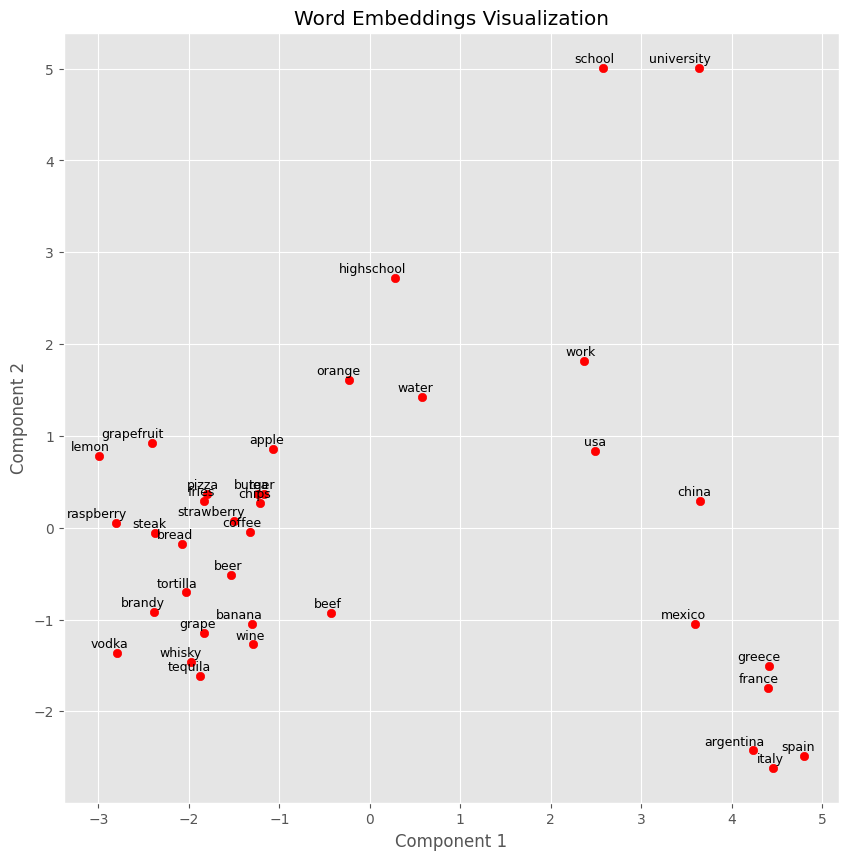

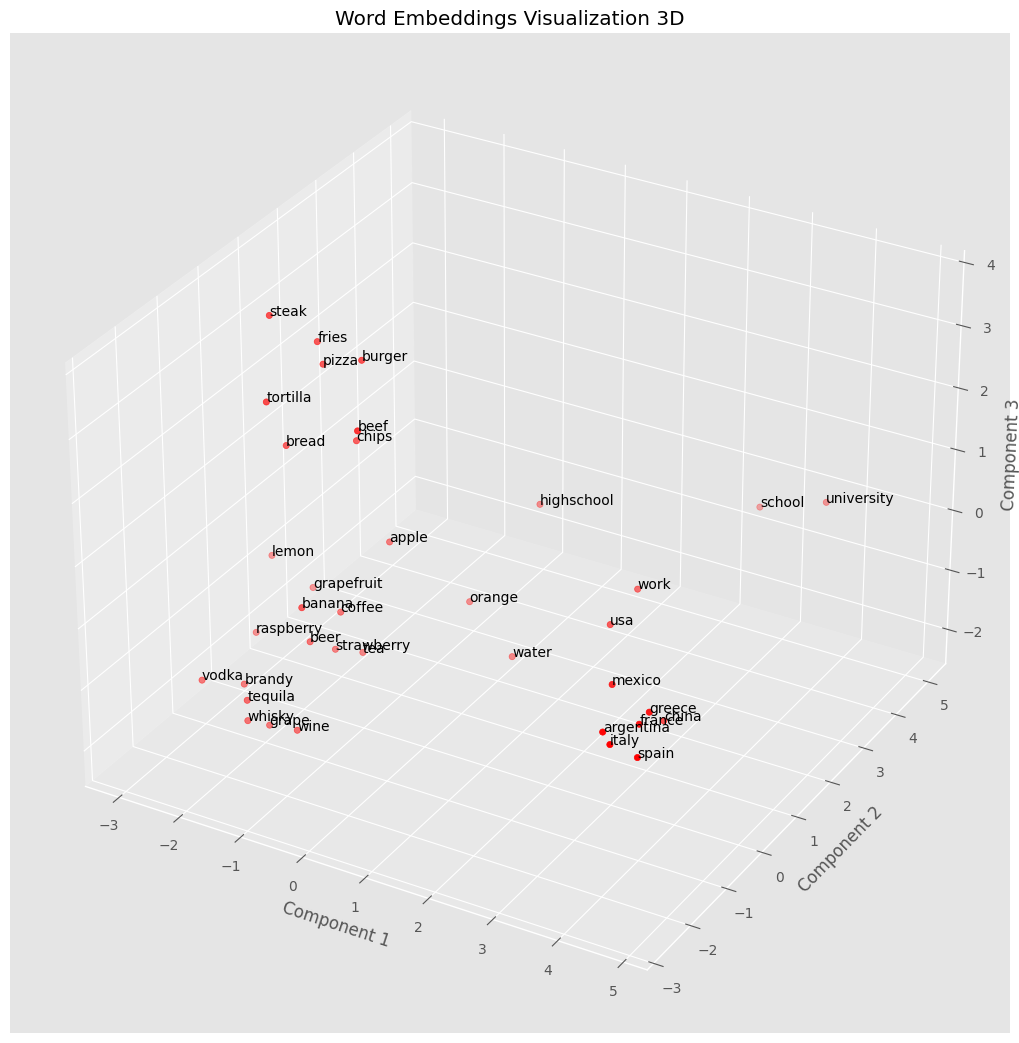

In [11]:
# PCA dimensionality reduction for visualization
plot_embeddings(PATH, words, emb_dim, embeddings_dict, PCA)

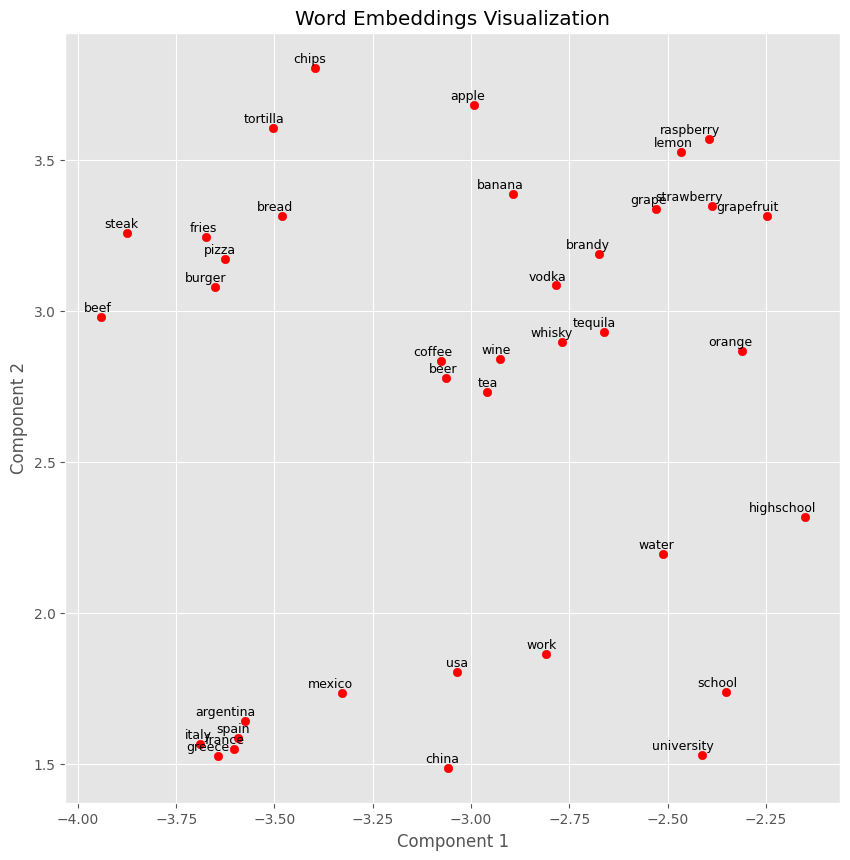

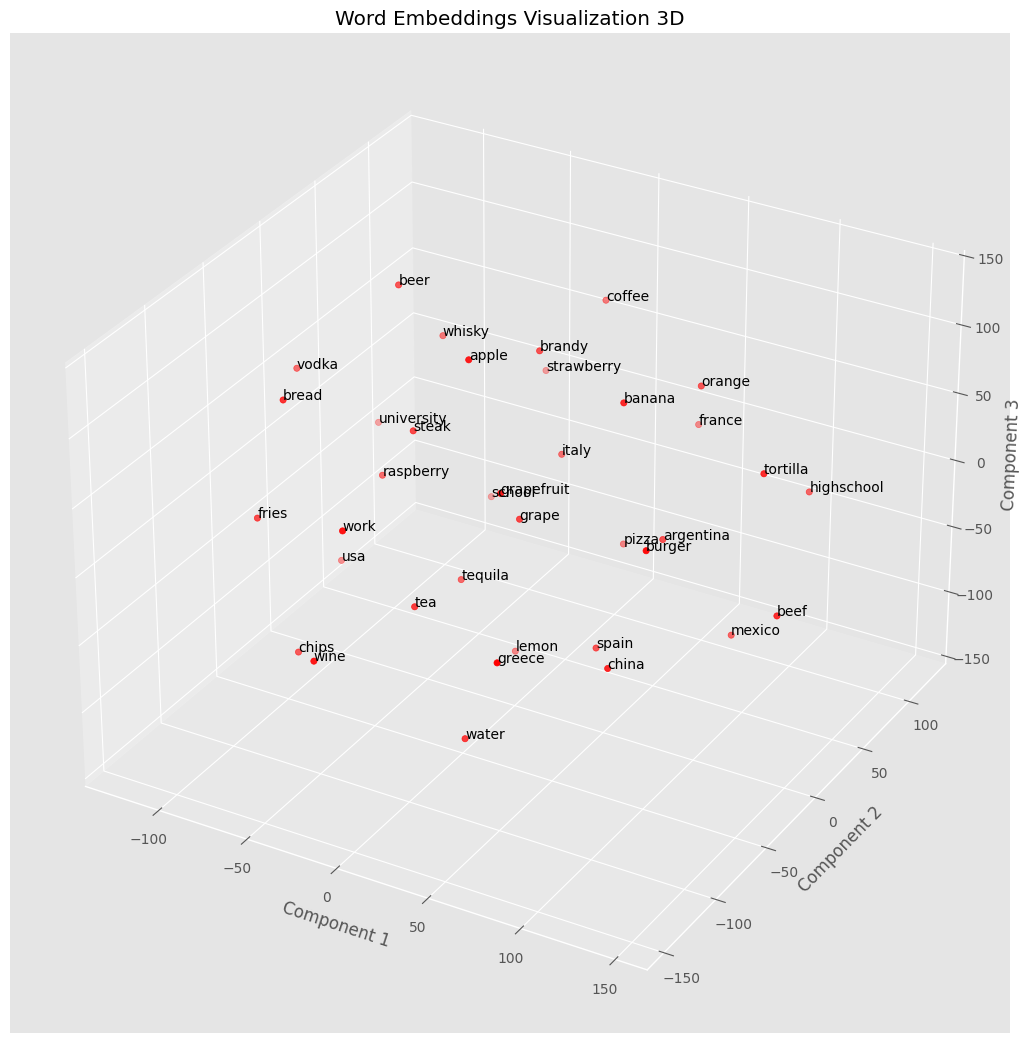

In [12]:
# t-SNE dimensionality reduction for visualization
embeddings = plot_embeddings(PATH, words, emb_dim, embeddings_dict, TSNE)

### Let us compute analogies

The **analogy** function computes word analogies by applying vector arithmetic in an embedding space. Given a relationship like "man is to king as woman is to ?", the function finds the missing word by solving:

$$
\vec{v}_{target} = \vec{v}_{word2} - \vec{v}_{word1} + \vec{v}_{word3}
$$

The function then searches for the word whose vector has the highest cosine similarity with target_vector, excluding the input words.

**Cosine similarity** measures how close two vectors are in a multidimensional space. It is defined as:

$$
cos(\theta) = \frac{A \cdot B}{\|A\| \|B\|}
$$

where A and B are vectors, and θ is the angle between them. Similarity values range from -1 (opposite) to 1 (identical), with 0 meaning no correlation (Rahim et al., 2024, p. 5). If two vectors point in opposite directions (180°), their cosine similarity is -1 (Shkhanukova, 2023).

**Cosine distance**, on the other hand, measures dissimilarity and is defined as:

$$
\text{cosine distance} = 1 \ - \ \text{cosine similarity}
$$

It ranges from 0 (identical) to 2 (completely different), providing an inverse measure of similarity (Chugani, 2024).

By leveraging these metrics, the function efficiently finds the best word to complete an analogy, making it a useful tool in semantic understanding and natural language processing.

In [13]:
# analogy
def analogy(word1, word2, word3, embeddings_dict):
    """
    Compute a word analogy. It should read like "word1 is to word2 as word3 is to [result]".

    This function calculates the target embedding using the vector arithmetic: target_vector = embedding(word2) - embedding(word1) + embedding(word3)
    It then searches for the word whose embedding has the highest cosine similarity with the target_vector, excluding the input words.

    Parameters:
        word1 (str): The first word in the analogy (e.g., "man")
        word2 (str): The second word in the analogy (e.g., "king")
        word3 (str): The third word in the analogy (e.g., "woman")
        embeddings_dict (dict): Dictionary mapping words to their vector representations

    Returns:
        str: The word that best completes the analogy

    Example:
        analogy("man", "king", "woman", embeddings_dict) might return "queen"
    """

    # Verify that all the input words exist in the embeddings dictionary.
    for word in [word1, word2, word3]:
        if word not in embeddings_dict:
            raise ValueError(f"Word '{word}' not found in the embeddings dictionary.")

    # Compute the target vector using the analogy arithmetic.
    target_vector = embeddings_dict[word2] - embeddings_dict[word1] + embeddings_dict[word3]

    # Normalize the target vector to unit length to use cosine similarity.
    target_norm = np.linalg.norm(target_vector)
    target_vector_normalized = target_vector / target_norm

    best_word = None       # Variable to store the best matching word.
    best_similarity = -1.0 # Initialize with the lowest possible cosine similarity.

    # Iterate over all words in the dictionary to find the most similar embedding.
    for word, vector in embeddings_dict.items():
        # Exclude the input words from the candidates.
        if word in {word1, word2, word3}:
            continue

        # Normalize the candidate vector.
        vector_norm = np.linalg.norm(vector)
        if vector_norm == 0:
            continue  # Skip vectors with zero norm to avoid division by zero.
        vector_normalized = vector / vector_norm

        # Compute the cosine similarity between the candidate and the target vector.
        similarity = np.dot(target_vector_normalized, vector_normalized)

        # Update best_word if a higher similarity is found.
        if similarity > best_similarity:
            best_similarity = similarity
            best_word = word

    return best_word

In [14]:
analogy('mexico', 'mexican', 'spain', embeddings_dict)

'spanish'

In [15]:
analogy('man', 'king', 'woman', embeddings_dict)

'queen'

### Let us compute similarities

This function **finds the most similar words to a given word** using cosine similarity. Cosine similarity measures how aligned two vectors are in a multidimensional space, allowing us to determine which words have the closest vector representations.

Cosine Similarity Calculation
The similarity between two vectors, and it is defined as:
$$
cos(\theta) = \frac{A \cdot B}{\|A\| \|B\|}
$$

Where:
  - A⋅B is the dot product of the vectors.
  - ∥A∥ and
  - ∥B∥ are the Euclidean norms of the vectors.
  - θ is the angle between the two vectors.

This metric ranges from [−1,1], where:
  - 1 indicates identical vectors (maximum similarity).
  - 0 indicates no correlation.
  - -1 indicates completely opposite vectors.


In [16]:
# most similar
def find_most_similar(word, embeddings_dict, top_n=10):
    """
    Find the top N most similar words to a given word based on cosine similarity.

    This function computes the cosine similarity between the embedding of the input word and all other embeddings in the dictionary,
    then returns the top N words with the highest similarity scores.

    Parameters:
        word (str): The query word for which similar words are to be found
        embeddings_dict (dict): Dictionary mapping words to their vector representations
        top_n (int, optional): Number of similar words to return. Defaults to 10

    Returns:
        list of tuples: A list of tuples (similar_word, similarity_score) sorted in descending order by similarity

    Raises:
        ValueError: If the query word is not found in the embeddings dictionary or its vector has zero norm

    Example:
        most_similar = find_most_similar('mexico', embeddings_dict)
    """

    # Check if the input word exists in the embeddings dictionary.
    if word not in embeddings_dict:
        raise ValueError(f"Word '{word}' not found in the embeddings dictionary.")

    # Retrieve and normalize the vector for the query word.
    query_vector = embeddings_dict[word]
    query_norm = np.linalg.norm(query_vector)
    query_vector_normalized = query_vector / query_norm

    similarities = []  # List to store tuples of (word, similarity_score)

    # Iterate through all words in the embeddings dictionary.
    for other_word, other_vector in embeddings_dict.items():
        # Skip comparing the word with itself.
        if other_word == word:
            continue

        # Normalize the candidate word vector.
        other_norm = np.linalg.norm(other_vector)
        if other_norm == 0:
            continue  # Skip if the vector norm is zero to avoid division by zero.
        other_vector_normalized = other_vector / other_norm

        # Calculate cosine similarity between the query and candidate vectors.
        similarity = np.dot(query_vector_normalized, other_vector_normalized)
        similarities.append((other_word, similarity))

    # Sort the list by similarity score in descending order.
    similarities.sort(key=lambda x: x[1], reverse=True)

    # Return the top N most similar words.
    return similarities[:top_n]

In [17]:
most_similar = find_most_similar('mexico', embeddings_dict)

In [18]:
for i, w in enumerate(most_similar, 1):
    print(f'{i} ---> {w[0]}')

1 ---> mexican
2 ---> venezuela
3 ---> colombia
4 ---> peru
5 ---> guatemala
6 ---> argentina
7 ---> brazil
8 ---> chile
9 ---> bolivia
10 ---> america


## **Conclusion**

The previous material introduces the importance of word embeddings in the context of Deep Learning, particularly in Natural Language Processing (NLP). It give us an idea and explains how embeddings represent words as numerical vectors in a continuous space rather than simply assigning them a unique number in a dictionary. This is crucial because a single numerical value does not capture meaning or relationships between words. The concept of embeddings extends beyond words to other data types.

## **References**

Chugani, V. (2024, 28 of July). *What is Cosine Distance?*. Datacamp. https://www.datacamp.com/tutorial/cosine-distance.

Huang, J., Wang, F., Qiao, L., & Yang, X. (2023). T-distributed stochastic neighbor embedding echo state network with state matrix dimensionality reduction for time series prediction. *Engineering Applications of Artificial Intelligence*, *122*, 1-9. https://doi.org/10.1016/j.engappai.2023.106055.

Kim, D. H., Kim, M., Lee, S., & Seo, J. (2025). Principal component analysis for low-dimensional reconstruction of roll-coupled sway and yaw dynamics in maneuver. *Ocean Engineering*, *318*, 1-15. https://doi.org/10.1016/j.oceaneng.2024.120167.

Rahim, M., Suliman Abosuliman, S., Alroobaea, R., Shah, K., & Abdeljawad, T. (2024). Cosine similarity and distance measures for quasirung orthopair fuzzy sets: Applications in investment decision-making. *Heliyon*, *10*, 1-16. https://doi.org/10.1016/j.heliyon.2024.e32107.

Scikit-learn. (2016, 4 of August). *PCA*. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.

Scikit-learn. (2016, 4 of August). *TSNE*. Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html.

Shkhanukova, M. (2023, 4 of March). *Cosine distance and cosine similarity*. Datacamp. https://medium.com/@milana.shxanukova15/cosine-distance-and-cosine-similarity-a5da0e4d9ded.